[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juandados/fsdl/blob/master/lab2/notebooks/02-look-at-emnist-lines.ipynb)

In [1]:
!git clone https://github.com/juandados/fsdl.git

Cloning into 'fsdl'...
remote: Enumerating objects: 238, done.
remote: Counting objects: 100% (238/238), done.
remote: Compressing objects: 100% (164/164), done.
remote: Total 238 (delta 79), reused 212 (delta 64), pack-reused 0
Receiving objects: 100% (238/238), 3.57 MiB | 18.08 MiB/s, done.
Resolving deltas: 100% (79/79), done.


In [2]:
cd fsdl/lab2/

/content/fsdl/lab2


In [4]:
!pip install boltons

     |████████████████████████████████| 174kB 5.1MB/s 


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import nltk
import numpy as np

%load_ext autoreload
%autoreload 2

from importlib.util import find_spec
if find_spec("text_recognizer") is None:
    import sys
    sys.path.append('..')

from text_recognizer.datasets.emnist_lines_dataset import EmnistLinesDataset, construct_image_from_string, get_samples_by_char
from text_recognizer.datasets.sentence_generator import SentenceGenerator

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Synthetic Dataset

We can put together EMNIST characters into sequences.
The sequences will be drawn from a natural language corpus.

Let's start by just drawing 8 characters at a time, with no overlap between the letters.

In [7]:
sentence_generator = SentenceGenerator()
for _ in range(8):
    print(sentence_generator.generate(max_length=8))

you_____


ValueError: ignored

In [8]:
dataset = EmnistLinesDataset(max_length=8, max_overlap=0)
dataset.load_or_generate_data()
print(dataset)

EmnistLinesDataset generating data...


  0%|          | 8.00k/709M [00:00<4:40:06, 44.3kB/s]

709MB [00:11, 64.4MB/s]                           


Computing SHA-256...
Unzipping EMNIST...
Loading training data from .mat file
Balancing classes to reduce amount of data
Saving to HDF5 in a compressed format...
Saving essential dataset parameters to text_recognizer/datasets...
Cleaning up...
EmnistLinesDataset generating data...
EmnistLinesDataset loading data from HDF5...
EMNIST Lines Dataset
Max length: 8
Min overlap: 0
Max overlap: 0
Num classes: 80
Input shape: (28, 224)
Train: (10000, 28, 224) (10000, 8, 80)
Test: (1000, 28, 224) (1000, 8, 80)



In [9]:
print('Mapping:', dataset.mapping)

Mapping: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'c', 39: 'd', 40: 'e', 41: 'f', 42: 'g', 43: 'h', 44: 'i', 45: 'j', 46: 'k', 47: 'l', 48: 'm', 49: 'n', 50: 'o', 51: 'p', 52: 'q', 53: 'r', 54: 's', 55: 't', 56: 'u', 57: 'v', 58: 'w', 59: 'x', 60: 'y', 61: 'z', 62: ' ', 63: '!', 64: '"', 65: '#', 66: '&', 67: "'", 68: '(', 69: ')', 70: '*', 71: '+', 72: ',', 73: '-', 74: '.', 75: '/', 76: ':', 77: ';', 78: '?', 79: '_'}


**Note** that the last character is a padding character

In [10]:
def convert_y_label_to_string(y, dataset=dataset):
    return ''.join([dataset.mapping[i] for i in np.argmax(y, axis=-1)])

y_example = dataset.y_train[0]
print(y_example, y_example.shape)
convert_y_label_to_string(dataset.y_train[0])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1

'and_____'

and_____
think___
call____
wrote___
and_____
thought_
another_
put_____
aware___


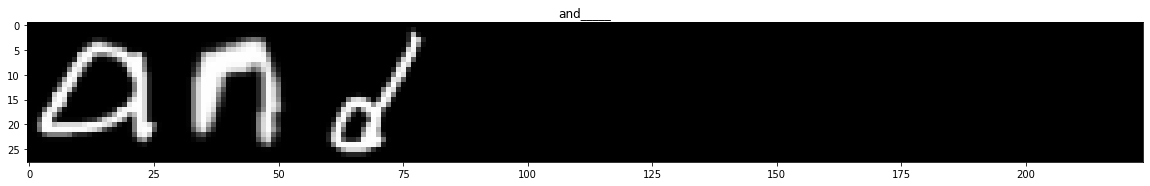

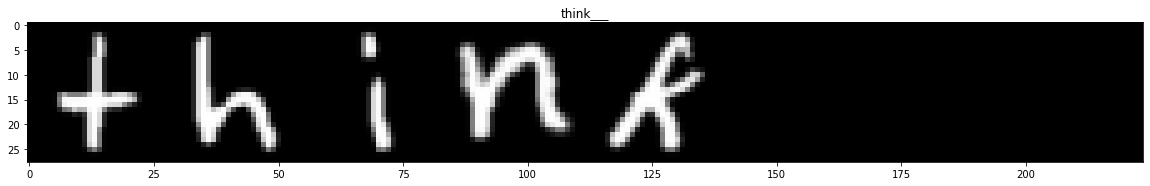

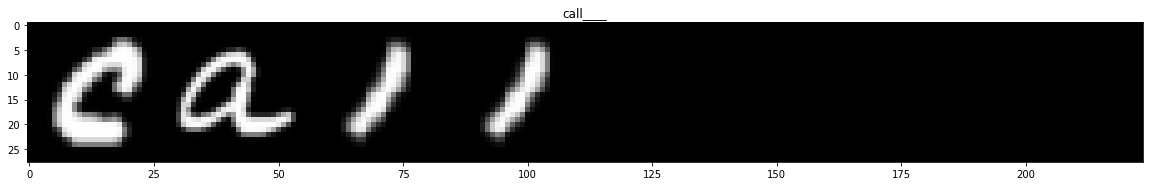

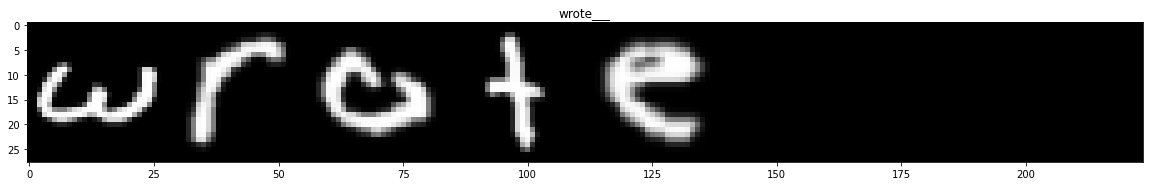

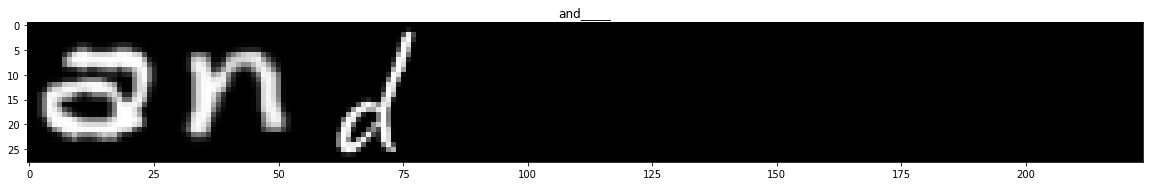

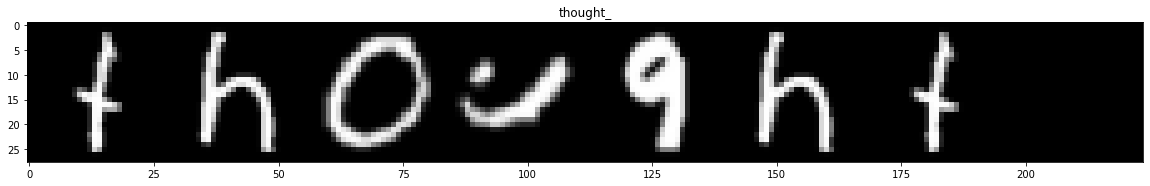

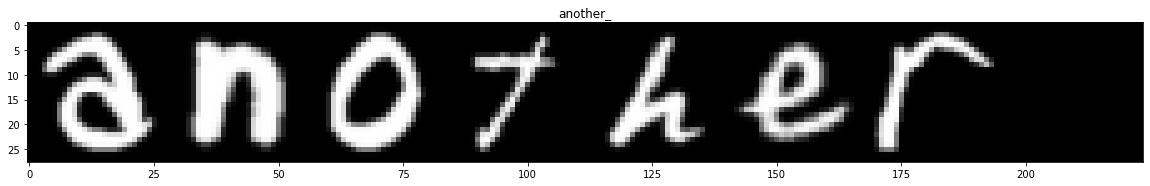

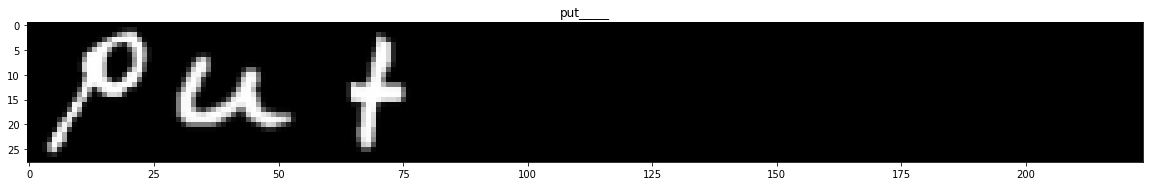

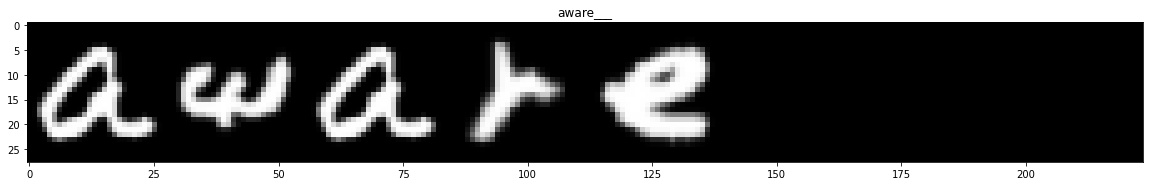

In [11]:
num_samples_to_plot = 9

for i in range(num_samples_to_plot):
    plt.figure(figsize=(20, 20))
    sentence = convert_y_label_to_string(dataset.y_train[i]) 
    print(sentence)
    plt.title(sentence)
    plt.imshow(dataset.x_train[i], cmap='gray')

## Making it more difficult

Let's now expand the maximum number of characters in a line, and add a random amount of overlap between the letters.

In [12]:
dataset = EmnistLinesDataset(max_length=34, max_overlap=0.33)
dataset.load_or_generate_data()
print(dataset)

EmnistLinesDataset generating data...
EmnistLinesDataset generating data...
EmnistLinesDataset loading data from HDF5...
EMNIST Lines Dataset
Max length: 34
Min overlap: 0
Max overlap: 0.33
Num classes: 80
Input shape: (28, 952)
Train: (10000, 28, 952) (10000, 34, 80)
Test: (1000, 28, 952) (1000, 34, 80)



the fire for washing______________
go much further than______________
a complete________________________
upper_____________________________
ancestry extending________________
high ground_______________________
voyage The sickness was___________
I said Its a kindness to__________
analyzing the results_____________


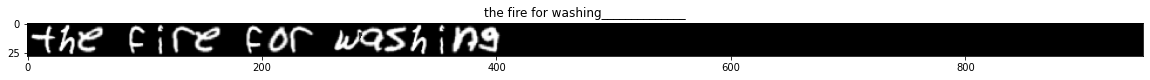

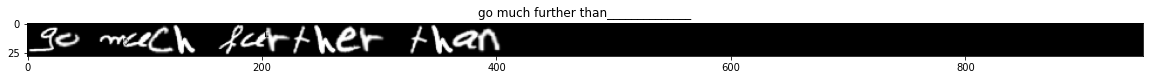

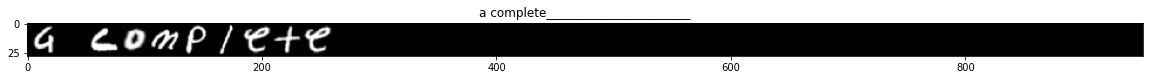

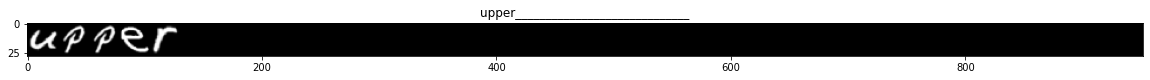

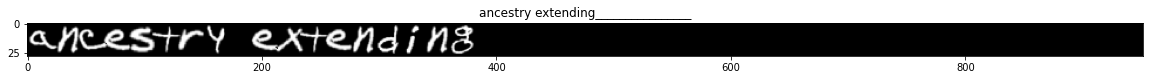

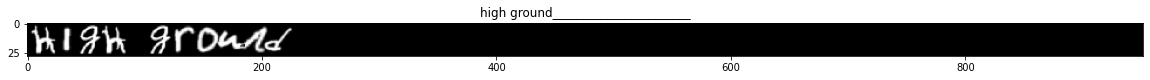

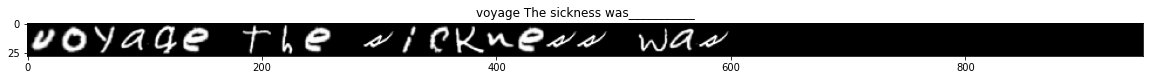

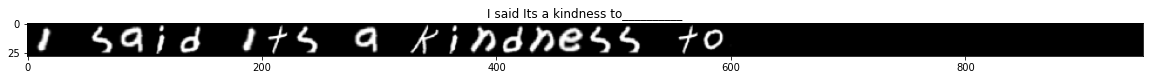

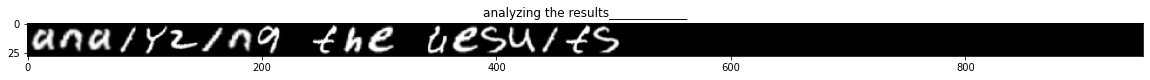

In [13]:
num_samples_to_plot = 9

for i in range(num_samples_to_plot):
    plt.figure(figsize=(20, 20))
    sentence = convert_y_label_to_string(dataset.y_train[i]) 
    print(sentence)
    plt.title(sentence)
    plt.imshow(dataset.x_train[i], cmap='gray')